# Parcialito V - Registración de imágenes

Alumna: Brisa Rojas
Legajo: 60535

## Lectura de las imagenes 


In [41]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
from scipy.ndimage import rotate
from skimage.transform import rescale, rotate, resize
from skimage import transform as tf
import cv2

In [42]:
path_a = './img3a.jpeg'
path_b = './img3b.jpeg'

img_a = cv2.imread(path_a)
img_b = cv2.imread(path_b)

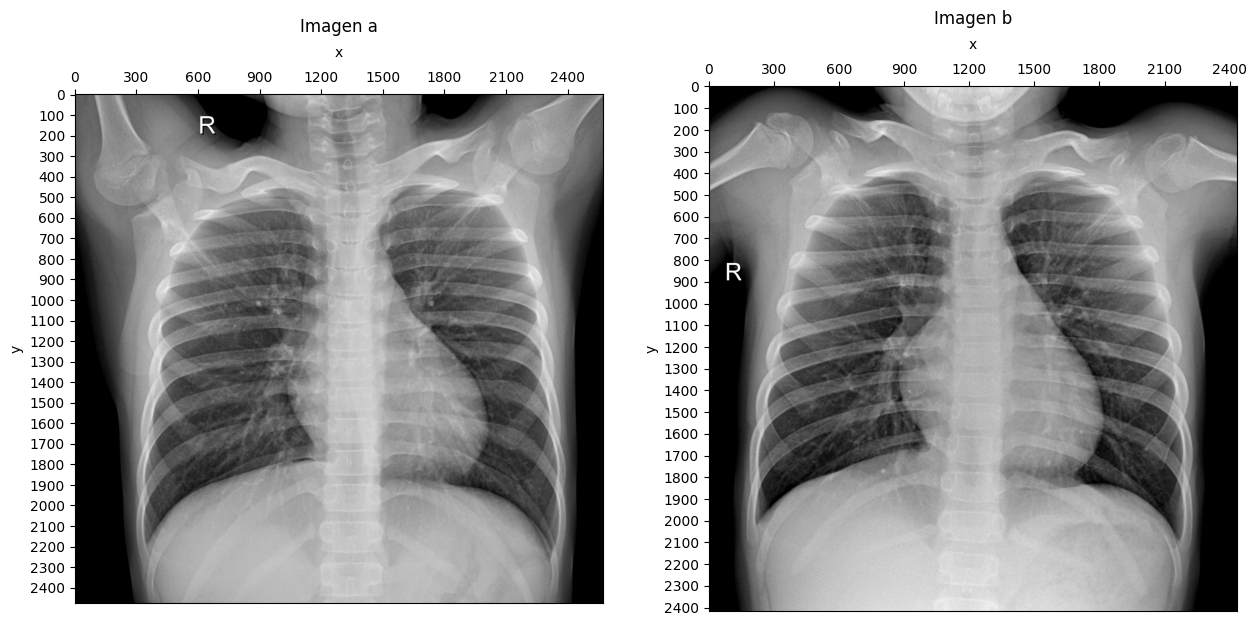

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

# imagen a
ax[0].imshow(img_a,cmap='gray')
ax[0].set_title('Imagen a', pad = 10)
ax[0].set_xlabel('x')
x = img_a.shape[1]
ax[0].set_xticks(np.arange(0, x, 300))
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.labelpad = 10
ax[0].xaxis.set_ticks_position('top')
ax[0].set_ylabel('y')
y = img_a.shape[0]
ax[0].set_yticks(np.arange(0, y, 100))

#imagen b
ax[1].imshow(img_b,cmap='gray')
ax[1].set_title('Imagen b', pad = 10)
ax[1].set_xlabel('x')
ax[1].set_xticks(np.arange(0, x, 300))
ax[1].xaxis.set_label_position('top')
ax[1].xaxis.labelpad = 10
ax[1].xaxis.set_ticks_position('top')
ax[1].set_ylabel('y')
ax[1].set_yticks(np.arange(0, y,  100))

plt.show()

A ojo vemos que no tienen el mismo tamaño, por lo que voy a imprimir sus tamaños para corroborar.

In [44]:
print (f'La imagen a tiene un tamaño de {img_a.shape[0]} x {img_a.shape[1]} pixeles')
print (f'La imagen b tiene un tamaño de {img_b.shape[0]} x {img_b.shape[1]} pixeles')

La imagen a tiene un tamaño de 2476 x 2572 pixeles
La imagen b tiene un tamaño de 2418 x 2434 pixeles


## Consignas

### Pregunta 1:
Para registrar las imágenes a y b. Es necesario escalarlas para que ambas tengan la misma dimensión? Justificar. 

El registro de imágenes no requiere necesariamente que las imágenes a y b tengan exactamente la misma dimensión. Durante el proceso de registro, se buscan transformaciones geométricas para alinear las características clave de las imágenes. Aunque se pueden aplicar ajustes de escala utilizando técnicas de interpolación si hay diferencias de tamaño, no es imprescindible. Sin embargo, si las diferencias de escala son significativas, se recomienda realizar un ajuste previo para obtener resultados más precisos en el registro.

En este caso, considero que la diferencia en dimensión no es significativa y que por lo tanto con la matriz de transformación (mejor dicho, con las componentes correspondientes al escalado) es suficiente para no tener que reescalarlas previamente.

### Pregunta 2:
Proponer alguna manera de registrar por puntos la imagen a y b. Probar.

In [45]:
# DEFINICIÓN DE FUNCIONES DE REGISTRO DE LA CLASE PRÁCTICA
def centroDeMasa(coor_x, coor_y):
  xsum = 0
  ysum = 0
  for i in range(len(coor_x)):
    xsum += coor_x[i]
    ysum += coor_y[i]
  
  centro_x = xsum/len(coor_x)
  centro_y = ysum/len(coor_y)

  return (centro_x,centro_y)

def restarCentro(coor_x,coor_y,centro_x,centro_y):

  coor_n_x=[]
  coor_n_y=[]

  for i in range(len(coor_x)):
    coor_n_x.append(coor_x[i] - centro_x)
    coor_n_y.append(coor_y[i] - centro_y)
  
  return (coor_n_x,coor_n_y)

Ahora voy a marcar los puntos a usar para registrar las imagenes.
Para esto voy a definir distintas coordenadas de interes en la imagen A y buscar a que punto es ideal mapear cada uno en la imagen B.

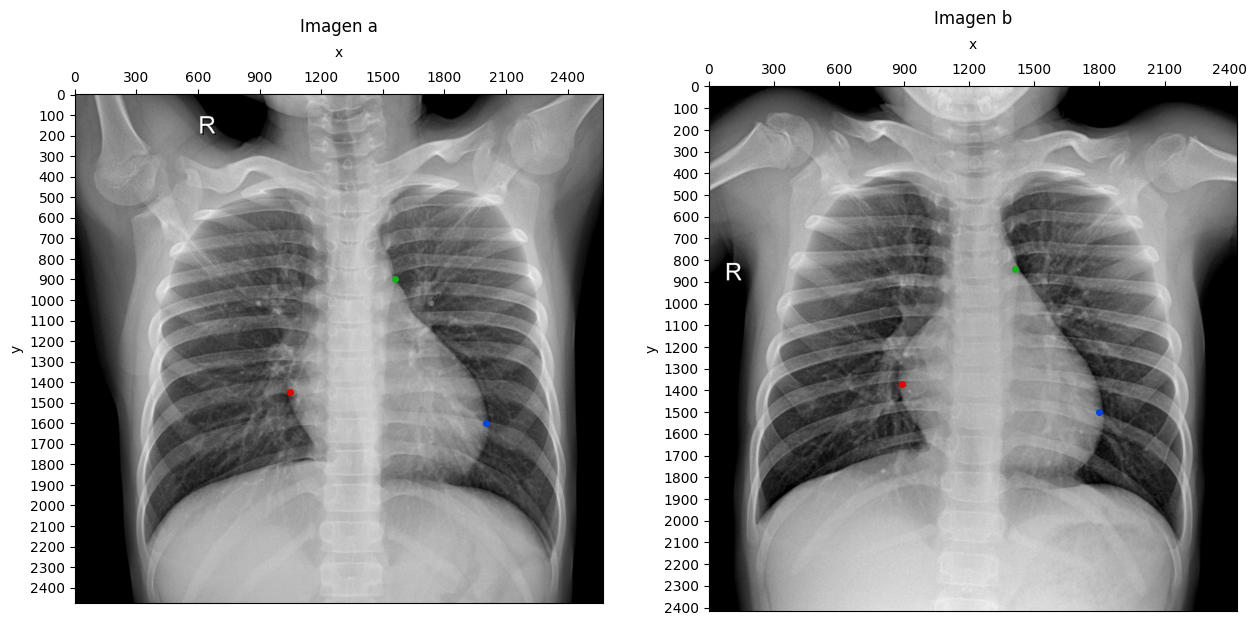

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

# Lista de colores xkcd para colorear los puntos
COLOR_NAMES = [
    'red',
    'blue',
    'green',
    'yellow',
    'purple',
    'orange',
    'pink',
    'brown',
    'teal',
    'navy',
    'magenta',
    'cyan',
    'lime',
    'maroon',
    'olive',
    'aqua',
    'silver',
    'gold',
    'indigo',
    'violet'
]

# Diccionario de puntos P
puntos_P = {
    'cora1': [1050, 1450],
    'cora2': [2000, 1600],
    'cora3': [1560, 900],
    # 'clav_r': [900, 310],
    # 'clav_l': [1835, 330],
    # 'costilla1R': [800, 490],
    # 'costilla2L': [2085, 520]
}

# Lista de puntos en A
puntosP = list(puntos_P.values())


# Diccionario de puntos Q
puntos_Q = {
    'cora1': [890, 1370],
    'cora2': [1800, 1500],
    'cora3': [1410, 840],
    # 'clav_r': [795, 177],
    # 'clav_l': [1740, 350],
    # 'costilla1R': [700, 400],
    # 'costilla2L': [1900, 490]
}

# Lista de puntos en B
puntosQ = list(puntos_Q.values())


# imagen a
ax[0].imshow(img_a, cmap='gray')
ax[0].set_title('Imagen a', pad=10)
ax[0].set_xlabel('x')
x = img_a.shape[1]
ax[0].set_xticks(np.arange(0, x, 300))
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.labelpad = 10
ax[0].xaxis.set_ticks_position('top')
ax[0].set_ylabel('y')
y = img_a.shape[0]
ax[0].set_yticks(np.arange(0, y, 100))

for i in range(len(puntosP)):
    ax[0].plot(puntosP[i][0], puntosP[i][1],
               color=f'xkcd:{COLOR_NAMES[i]}', marker='o', markersize=4)


# imagen b
ax[1].imshow(img_b, cmap='gray')
ax[1].set_title('Imagen b', pad=10)
ax[1].set_xlabel('x')
ax[1].set_xticks(np.arange(0, x, 300))
ax[1].xaxis.set_label_position('top')
ax[1].xaxis.labelpad = 10
ax[1].xaxis.set_ticks_position('top')
ax[1].set_ylabel('y')
ax[1].set_yticks(np.arange(0, y,  100))

for i in range(len(puntosQ)):
    ax[1].plot(puntosQ[i][0], puntosQ[i][1],
               color=f'xkcd:{COLOR_NAMES[i]}', marker='o', markersize=4)

plt.show()

Asumo que el objetivo de esta registración es observar cambios en el corazón y por lo tanto "defino" (imaginariamente) un triangulo en el mismo, donde ubico un punto en cada vértice.

Agrego otros puntos en "nodos" del esqueleto para alinear las imagenes.
 Esos son los puntos que voy a usar para la registración.

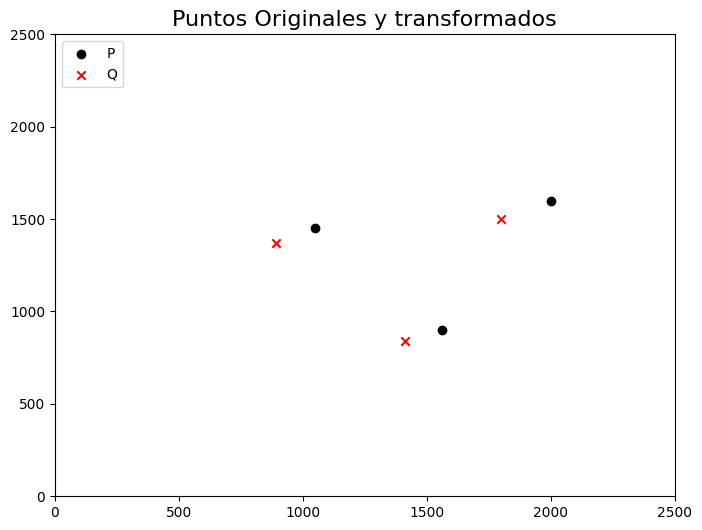

In [47]:
# Sigo los pasos de clase

Px = [p[0] for p in puntosP]
Py = [p[1] for p in puntosP]
Qx = [q[0] for q in puntosQ]
Qy = [q[1] for q in puntosQ]

# Grafico los puntos
ax, fig = plt.subplots(1, 1, figsize=(8,6))

plt.scatter(Px,Py, c='black', marker="o", label='P')
plt.scatter(Qx,Qy, c='r', marker="x", label='Q')
plt.legend(loc='upper left')
plt.title('Puntos Originales y transformados',fontsize=16)

# Setear limites de los ejes
plt.xlim(0, 2500)
plt.ylim(0, 2500)

plt.show()


Parece ser una translación a simple vista con una rotación nula o despreciable.

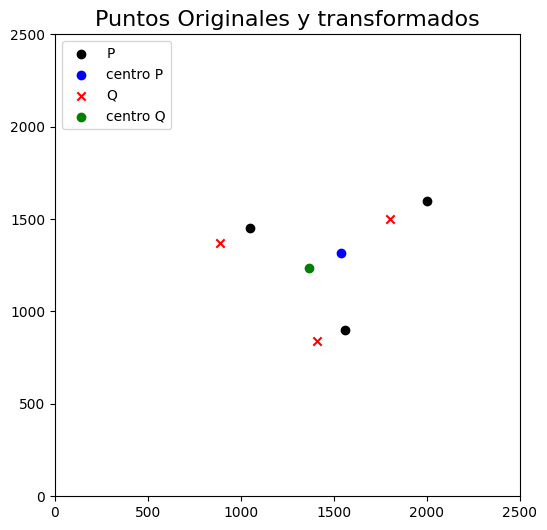

In [48]:
cPx, cPy = centroDeMasa(Px,Py)
cQx, cQy = centroDeMasa(Qx,Qy)

# grafico los puntos y su centro de masa

ax, fig = plt.subplots(1, 1, figsize=(6,6))

plt.scatter(Px,Py, c='black', marker="o", label='P')
plt.scatter(cPx, cPy, c='blue', marker="o", label='centro P')
plt.scatter(Qx,Qy, c='r', marker="x", label='Q')
plt.scatter(cQx, cQy, c='green', marker="o", label='centro Q')
plt.legend(loc='upper left')
plt.title('Puntos Originales y transformados',fontsize=16)

# Setear limites de los ejes
plt.xlim(0, 2500)
plt.ylim(0, 2500)

plt.show()

In [49]:
Pnx, Pny = restarCentro(Px,Py,cPx,cPy)
Qnx, Qny = restarCentro(Qx,Qy,cQx,cQy)

Pn = np.array([Pnx,Pny]).T
Qn = np.array([Qnx,Qny]).T
print(Pn)

[[-486.66666667  133.33333333]
 [ 463.33333333  283.33333333]
 [  23.33333333 -416.66666667]]


In [50]:
K =  np.matmul(Qn.T, Pn)
print(K)

[[433766.66666667  41166.66666667]
 [ 47866.66666667 257666.66666667]]


In [51]:
U,S,Vt= np.linalg.svd(K)
print('U:',U)
print('S:',S)
print('Vt:',Vt)

U: [[-0.97159951 -0.23663134]
 [-0.23663134  0.97159951]]
S: [444396.64983462 247069.14429004]
Vt: [[-0.97384675 -0.22720586]
 [-0.22720586  0.97384675]]


In [52]:
R = np.matmul(Vt.T,U.T)
print('Matriz de Rotación:')
print(R)

##Calculamos ángulo de rotación 
ang = np.arcsin(R[1,0])*180/np.pi
print('Ángulo de rotación:')
print(ang)

Matriz de Rotación:
[[ 0.99995306  0.00968956]
 [-0.00968956  0.99995306]]
Ángulo de rotación:
-0.5551796389763038


Confirmo que no estaba rotada, o no de forma considerable.

In [53]:
cP=np.array([cPx,cPy])
cQ=np.array([cQx,cQy])
t = cP - np.matmul(R,cQ)
print('Vector de traslación x, y:')
print(t)

Vector de traslación x, y:
[158.08140091  93.30045524]


Confirmo la traslación que se veía a simple vista.

Resumiendo, la matriz de transformación nos da la sig información:

In [54]:
tx=t[0]
ty=t[1]
print('ang:',ang,'tx:',tx, 'ty:', ty)

ang: -0.5551796389763038 tx: 158.08140090917777 ty: 93.30045524076081


Aplico la transformación calculada 

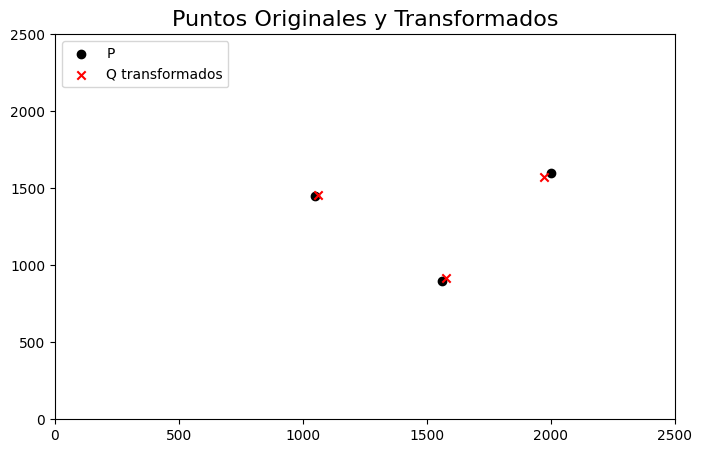

In [55]:
tform = tf.SimilarityTransform(scale=1, rotation=ang*np.pi/180, translation=(tx, ty)) #el ángulo se ingresa en radianes

Qx_transf=[]
Qy_transf=[]

for i in range(len(Qx)):
  coordenadas=(Qx[i],Qy[i])
  Q_transf=tform(coordenadas)
  Qx_transf.append(Q_transf[0][0])
  Qy_transf.append(Q_transf[0][1])
  
  
ax, fig = plt.subplots(1, 1, figsize=(8,5))

plt.scatter(Px,Py, c='black', marker="o", label='P')
plt.scatter(Qx_transf,Qy_transf, c='r', marker="x", label='Q transformados')
plt.legend(loc='upper left')

plt.title('Puntos Originales y Transformados',fontsize=16)

# Setear limites de los ejes
plt.xlim(0, 2500)
plt.ylim(0, 2500)

plt.show()



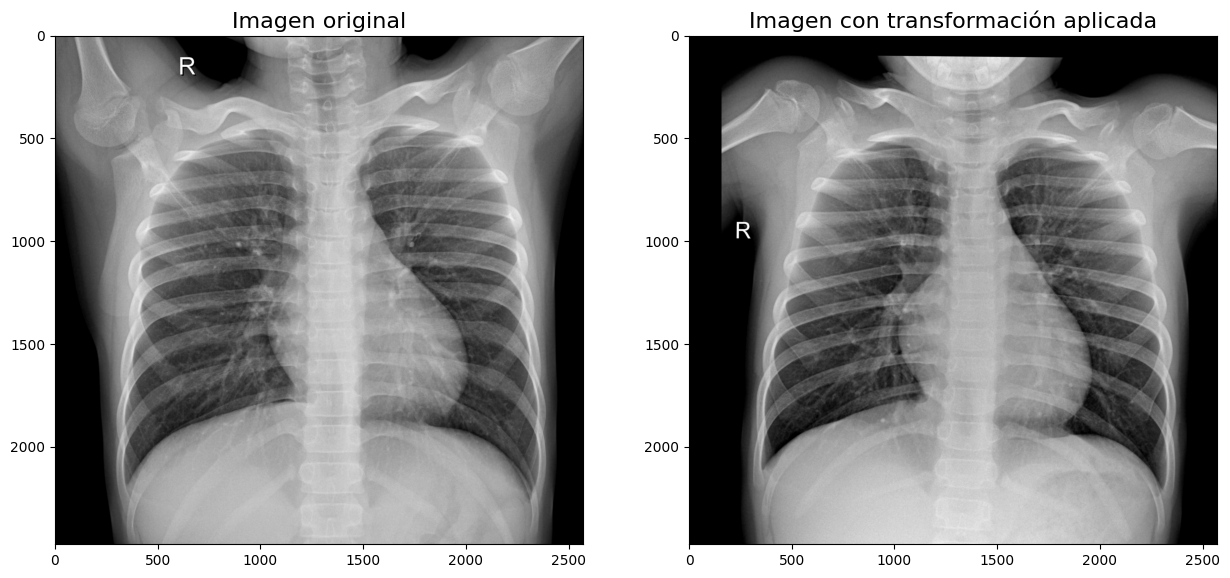

Las dimensiones de la imagen original son 2476 x 2572 pixeles 
 y las dimensiones de la img_b_reg son: 2476 x 2572 pixeles


In [56]:
#Imagen original a
height, width = img_a.shape[:2]

M = cv2.getRotationMatrix2D((0,0),ang,1) #el ángulo se ingresa en grados
img_inv_transf = cv2.warpAffine(img_b,M,(width,height))

#Aplicamos la traslación a la imagen transformada rotada
M = np.float32([[1, 0, tx], [0, 1, ty]])
img_b_reg = cv2.warpAffine(img_inv_transf, M, (width, height)) 

plt.figure(figsize=(15,12))
plt.subplot(121),plt.imshow(img_a,cmap='gray'), plt.title('Imagen original',fontsize=16)
plt.subplot(122),plt.imshow(img_b_reg,cmap='gray'), plt.title('Imagen con transformación aplicada',fontsize=16)
plt.show()

print(f'Las dimensiones de la imagen original son {img_a.shape[0]} x {img_a.shape[1]} pixeles \n y las dimensiones de la img_b_reg son: {img_b_reg.shape[0]} x {img_b_reg.shape[1]} pixeles')


### Pregunta 3:
Proponer alguna manera de registrar por superficies la imagen a y b. Probar. 


In [57]:
# DEFINCIÓN DE LAS FUNCIONES NECESARIAS DE LA PRÁCTICA
def MSE(Qx_transf,Qy_transf,Xx,Xy):
  
  mse = 0
  Q = np.array([Qx_transf,Qy_transf]).T
  X = np.array([Xx,Xy]).T

  for i in range(len(Xx)):
    mse += (np.linalg.norm(Q[i]-X[i]))**2
    
  return (mse/len(Xx))

def minimaCorrespondencia(P_x,P_y,Q_x,Q_y):

  minimos_x = []
  minimos_y = []
  
  for i in range(len(P_x)):
    distMin = np.inf #inicializo con número grande para realizar comparación
    for j in range(len(P_x)):
      resta_x = (P_x[j] - Q_x[i])
      resta_y = (P_y[j] - Q_y[i])
      dist  = np.sqrt((resta_x**2) + (resta_y**2))

      if(dist<distMin):
        minimo_x = P_x[j]
        minimo_y = P_y[j]
        distMin = dist.copy()

    minimos_x.append(minimo_x)
    minimos_y.append(minimo_y)

  return minimos_x,minimos_y

def sumarCentro(Pnx,Pny,cPx,cPy):

  P_x=[]
  P_y=[]
  
  for i in range(len(Pnx)):
    P_x.append(Pnx[i] + cPx)
    P_y.append(Pny[i] + cPy)
  
  return P_x,P_y


def distanciaMediaCuadrada(Px,Py,Qx,Qy):
  
  cPx, cPy = centroDeMasa(Px,Py)
  cQx, cQy = centroDeMasa(Qx,Qy)

  Pnx, Pny = restarCentro(Px,Py,cPx,cPy)
  Qnx, Qny = restarCentro(Qx,Qy,cQx,cQy)
  
  Pn = np.array([Pnx,Pny]).T
  Qn = np.array([Qnx,Qny]).T

  K =  np.matmul(Qn.T, Pn)

  U,S,Vt= np.linalg.svd(K)

  R = np.matmul(Vt.T,U.T)
  ang = np.arcsin(R[1,0])*180/np.pi

  t = cP - np.matmul(R,cQ)
  tx=t[0]
  ty=t[1]
  
  return R,t,ang,tx,ty

#Paso 1: Defino función ICP
def ICP(Px,Py,Qx,Qy, error, iteraciones): 
  
  #Paso 2: Calculo el centro de masa de P 
  cPx, cPy = centroDeMasa(Px,Py)

  #Paso 3: Resto centro de masa a los puntos P 
  Pnx, Pny = restarCentro(Px,Py,cPx,cPy)

  #Paso 4: Defino valores iniciales de error (mse) y contador (c)
  mse = np.inf
  c = 0
  
  #Paso 5: Genero bucle para aplicar distancia media cuadrada y check el error
  while(mse>error and c < iteraciones): #error lo definimos como un escalar menor a 1 (ej. 0.001), iteraciones= 10

    #Paso 6: Centro de masa de cQ, y resto a los puntos Q
    cQx, cQy = centroDeMasa(Qx,Qy)
    Qnx, Qny = restarCentro(Qx,Qy,cQx,cQy)
  
    #Paso 8: Busco mínima correspondencia entre puntos P y Q. Redefino el orden de los puntos P y lo denomino X
    Xnx = []
    Xny = []
    Xnx, Xny = minimaCorrespondencia(Pnx,Pny,Qnx,Qny)

    #Paso 9: Sumo centro de masa a los puntos X (nuevos puntos P)
    Xx, Xy = sumarCentro(Xnx,Xny,cPx,cPy)
   
    #Paso 10: Aplico algoritmo de distancia media cuadrada
    R,t,ang,tx,ty = distanciaMediaCuadrada(Xx,Xy,Qx,Qy)

    #Paso 11: Aplico transformación a los puntos Q para obtener Q_transf
    tform = tf.SimilarityTransform(scale=1, rotation=ang*np.pi/180, translation=(tx, ty)) #el ángulo se ingresa en radianes

    Qx_transf=[]
    Qy_transf=[]

    for i in range(len(Qx)):
      coordenadas=(Qx[i],Qy[i])
      Q_transf=tform(coordenadas)
      Qx_transf.append(Q_transf[0][0])
      Qy_transf.append(Q_transf[0][1])
    
    #Paso 12: Calculo error cuadrático medio
    mse = MSE(Qx_transf,Qy_transf,Xx,Xy)
    print(f'MSE: {mse}')

    #Paso 13: Aumento el contador que mide la cantidad de iteraciones
    c += 1

    #Paso 11
    Qx = Qx_transf.copy()
    Qy = Qy_transf.copy()

    ax,fig = plt.subplots(1,1,figsize=(8,5))
    
    plt.scatter(Px,Py, c='black', marker="o", label='P')
    plt.scatter(Qx,Qy, c='r', marker="x", label='Q transformados')
    plt.legend(loc='upper left')
    plt.title('Puntos Originales y Transformados',fontsize=16)

    plt.show()
    
  return Qx,Qy, mse, c

MSE: 711.6928057833035


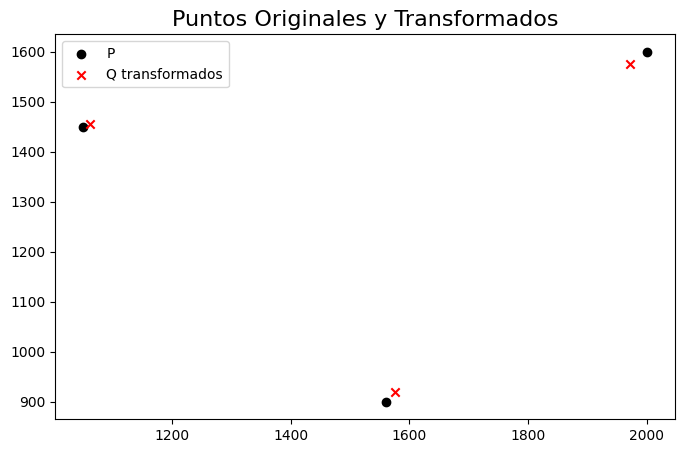

In [58]:
Qx_t,Qy_t, mse, c = ICP(Px,Py,Qx,Qy, 2500, 10)


### Pregunta 4:
Realizar el histograma conjunto (graficar) y calcular la información mutua de las imágenes a y b antes de registrarlas y repetir lo mismo una vez registradas. 

A diferencia de la registración, para el histograma conjunto si es necesario que las imagenes tengan la misma dimensión. Pero esto se logró en la pregunta 2, ya que se aplicó la transformación a la imagen B y esto dejo a ambas imagenes con la misma dimensión.

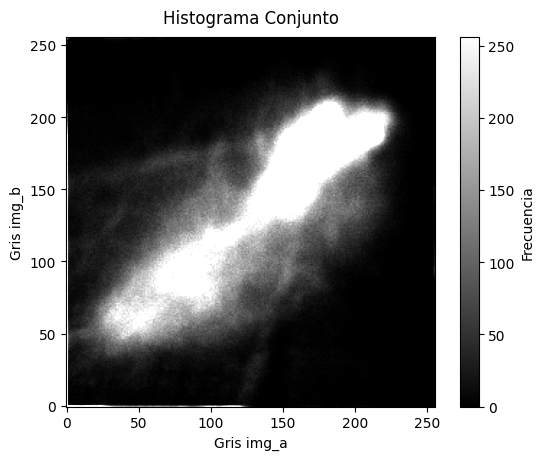

In [59]:
def generar_histograma_conjunto(img1, img2):
    # Asegurarse de que las imágenes tengan el mismo tamaño, sino
    # se levanta una excepción
    assert img1.shape == img2.shape

    # Crear el histograma conjunto vacío con el tamaño adecuado
    histogram = np.zeros((np.max(img1) + 1, np.max(img2) + 1))

    # Calcular el histograma conjunto
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            pixel1 = img1[i, j]
            pixel2 = img2[i, j]
            histogram[pixel1, pixel2] += 1


    max = np.max(histogram)

    # Visualizar el histograma conjunto
    plt.imshow(histogram, cmap='gray', origin='lower')
    plt.xlabel('Gris img_a')
    plt.ylabel('Gris img_b')
    plt.title('Histograma Conjunto', pad=10)
    plt.colorbar(label='Frecuencia')
    plt.clim(0, 256)  # Ajustar el rango del colorbar
    plt.show()

    return histogram


img_a_aux = img_a.copy()
img_a_aux = cv2.cvtColor(img_a_aux, cv2.COLOR_BGR2GRAY).astype(np.uint8)

img_b_reg_aux = img_b_reg.copy()
img_b_reg_aux = cv2.cvtColor(
    img_b_reg_aux, cv2.COLOR_BGR2GRAY).astype(np.uint8)

histConj = generar_histograma_conjunto(img_a_aux, img_b_reg_aux)

Si bien no es una linea perfecta, se puede ver que la registración mejoró la información mutua entre las imagenes, ya que la nube de puntos del histograma conjunto tiende a organizarse hacia una linea diagonal en el centro del gráfico.

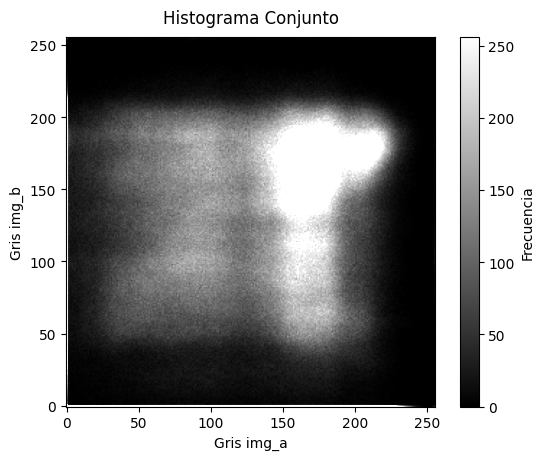

La información mutua pre registro es: -693.1787917482679
La información mutua post registro es: -1175.4504912246975


In [60]:
from skimage.feature import graycomatrix, graycoprops

def calcular_entropia(img):
    # Calcular la matriz de co-ocurrencia
    matriz_coocurrencia = graycomatrix(img, [1], [0], levels=np.max(img)+1, symmetric=True, normed=True)

    # Calcular la entropía utilizando greycoprops con prop='contrast'
    entropia = graycoprops(matriz_coocurrencia, prop='contrast')

    return entropia[0, 0]


def calcular_info_mutua(img1, img2, hist):
    e1 = calcular_entropia(img1)
    e2 = calcular_entropia(img2)
    e12 = calcular_entropia(hist)
    return e1 + e2 - e12

# Convierto a matriz 2D dtype uint8
img_b_gray = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY).astype(np.uint8)
hist_conj_gray = histConj.astype(np.uint8)
imagen_b_aux= np.resize(img_b_gray, img_a_aux.shape)

# Calculamos el hist conj antes de registrar
hist_pre = generar_histograma_conjunto(img_a_aux, imagen_b_aux )
hist_pre = hist_pre.astype(np.uint8)

# Calcular la información mutua
info_mutua = calcular_info_mutua(img_a_aux, imagen_b_aux, hist_pre)
print(f'La información mutua pre registro es: {info_mutua}')


info_mutua_postregistro = calcular_info_mutua(img_a_aux, img_b_reg_aux, hist_conj_gray)
print(f'La información mutua post registro es: {info_mutua_postregistro}')
